In [224]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from numpy import array
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from keras.preprocessing.text import one_hot, Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, GlobalMaxPooling1D, Embedding, Conv1D, LSTM
from tensorflow.keras.layers import GRU, Bidirectional
from sklearn.model_selection import train_test_split

In [88]:
movie_reviews = pd.read_csv("train_all_tasks.csv")

In [89]:
movie_reviews.shape

(14000, 5)

In [90]:
movie_reviews.head(10)

,rewire_id,text,label_sexist,label_category,label_vector
0,sexism2022_english-7358,"Damn, this writing was pretty chaotic",not sexist,none,none
1,sexism2022_english-2367,"Yeah, and apparently a bunch of misogynistic v...",not sexist,none,none
2,sexism2022_english-3073,How the FUCK is this woman still an MP!!!???,not sexist,none,none
3,sexism2022_english-14895,Understand. Know you're right. At same time I ...,not sexist,none,none
4,sexism2022_english-4118,Surprized they didn't stop and rape some women,not sexist,none,none
5,sexism2022_english-10376,yeah but in order to keep the benefit i have t...,not sexist,none,none
6,sexism2022_english-4569,Hahaha I just wish they would live their truth...,not sexist,none,none
7,sexism2022_english-91,head mod said she talked to him after he made ...,not sexist,none,none
8,sexism2022_english-10142,"just the inside of your wallet: cash, bank car...",sexist,2. derogation,2.3 dehumanising attacks & overt sexual object...
9,sexism2022_english-16316,We most definitely did. I didn’t go too much i...,not sexist,none,none


In [91]:
movie_reviews.isnull().values.any()

False

In [92]:
movie_reviews.drop(['rewire_id','label_category','label_vector'],axis=1,inplace=True)

In [93]:
movie_reviews.head(5)

,text,label_sexist
0,"Damn, this writing was pretty chaotic",not sexist
1,"Yeah, and apparently a bunch of misogynistic v...",not sexist
2,How the FUCK is this woman still an MP!!!???,not sexist
3,Understand. Know you're right. At same time I ...,not sexist
4,Surprized they didn't stop and rape some women,not sexist


# Preprocess

In [94]:
movie_reviews["text"][2]

'How the FUCK is this woman still an MP!!!???'

In [95]:
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    '''Removes HTML tags: replaces anything between opening and closing <> with empty space'''

    return TAG_RE.sub('', text)

In [96]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [97]:
def preprocess_text(sen):
    '''Cleans text data up, leaving only 2 or more char long non-stepwords composed of A-Z & a-z only
    in lowercase'''
    
    sentence = sen.lower()

    # Remove html tags
    sentence = remove_tags(sentence)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)  # When we remove apostrophe from the word "Mark's", the apostrophe is replaced by an empty space. Hence, we are left with single character "s" that we are removing here.

    # Remove multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)  # Next, we remove all the single characters and replace it by a space which creates multiple spaces in our text. Finally, we remove the multiple spaces from our text as well.

    # Remove Stopwords
    pattern = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')
    sentence = pattern.sub('', sentence)

    return sentence

In [98]:
X = []
sentences = list(movie_reviews['text'])
for sen in sentences:
    X.append(preprocess_text(sen))

In [99]:
X[2]

'fuck woman still mp '

In [100]:
y = movie_reviews['label_sexist']

y = np.array(list(map(lambda x: 1 if x=="not sexist" else 0, y)))

In [101]:
y

array([1, 1, 1, ..., 1, 1, 1])

In [102]:
# new=pd.DataFrame(zip(X, y), columns=['text', 'label_sexist'])

In [103]:
# new.head(5)

# Balancing

In [104]:
# import seaborn as sns
# sns.countplot(x='label_sexist', data=new)

In [105]:
# new['label_sexist'].value_counts()
# #0 = not sexist 1= sexist

In [106]:
# df_1 = new[new['label_sexist'] == 0].iloc[0: 3398, :]

In [107]:
# df_2 = new[new['label_sexist'] == 1].iloc[0: 3398, :]

In [108]:
# balanced = pd.concat([df_1,df_2])

In [109]:
# balanced['label_sexist'].value_counts()

In [110]:
# X = balanced.drop('label_sexist',axis='columns')
# y = balanced['label_sexist']

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [177]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train);

In [178]:
x_train = vectorizer.transform(X_train)
x_test = vectorizer.transform(X_test)

In [179]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

In [180]:
### Machine learning models
## Logistic regression
lr = LogisticRegression(max_iter=1000)
lr.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [181]:
#k-nearest neighbours
knn = KNeighborsClassifier(n_neighbors =5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [182]:
##Naive Bayes I
bnb = BernoulliNB()
bnb.fit(x_train, y_train)

BernoulliNB()

In [183]:
## Multinomial naive bayes
mnb = MultinomialNB ()
mnb.fit(x_train, y_train)

MultinomialNB()

In [184]:
### Support vector machine
svm_model = LinearSVC()
svm_model.fit(x_train, y_train)

LinearSVC()

In [185]:
### Random Forest
randomforest = RandomForestClassifier(n_estimators=100, random_state=50)
randomforest.fit(x_train, y_train)

RandomForestClassifier(random_state=50)

In [186]:
from sklearn.metrics import f1_score
f1_score_data = {'F1 Score': [f1_score(lr.predict(x_test), y_test),
                              f1_score(knn.predict(x_test), y_test),
                              f1_score(bnb.predict(x_test), y_test),
                              f1_score(mnb.predict(x_test), y_test),
                              f1_score(svm_model.predict(x_test), y_test),
                              f1_score(randomforest.predict(x_test), y_test)]}
##Saving fi score results into a dataframe
df_f1=pd.DataFrame(f1_score_data, index=['Log Regression', 'KNN', 'BernoulliNB', 'MultinomialNB', 'SVM', 'Random Forest'])
df_f1


,F1 Score
Log Regression,0.881851
KNN,0.855666
BernoulliNB,0.867957
MultinomialNB,0.877100
SVM,0.862061
Random Forest,0.893543


# For DL part

In [187]:
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(X_train)

X_train = word_tokenizer.texts_to_sequences(X_train)
X_test = word_tokenizer.texts_to_sequences(X_test)

In [188]:
vocab_length = len(word_tokenizer.word_index) + 1

vocab_length

18178

In [189]:
maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [190]:
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [191]:
embedding_matrix = zeros((vocab_length, 100))
for word, index in word_tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [192]:
embedding_matrix.shape

(18178, 100)

In [193]:
# Neural Network architecture
snn_model = Sequential()
embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)

snn_model.add(embedding_layer)
snn_model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
snn_model.add(Dense(1, activation='sigmoid'))

In [194]:
# Model compiling

snn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

print(snn_model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 100)          1817800   
                                                                 
 lstm_2 (LSTM)               (None, 64)                42240     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,860,105
Trainable params: 42,305
Non-trainable params: 1,817,800
_________________________________________________________________
None


In [197]:
# Model training

snn_model_history = snn_model.fit(X_train, y_train, batch_size=128, epochs=50, verbose=1, validation_split=0.2)

Epoch 1/50
70/70 [==============================] - 15s 207ms/step - loss: 0.4393 - acc: 0.7798 - val_loss: 0.4704 - val_acc: 0.7969
Epoch 2/50
70/70 [==============================] - 14s 207ms/step - loss: 0.4321 - acc: 0.8119 - val_loss: 0.4628 - val_acc: 0.7964
Epoch 3/50
70/70 [==============================] - 19s 273ms/step - loss: 0.4123 - acc: 0.8235 - val_loss: 0.4311 - val_acc: 0.8147
Epoch 4/50
70/70 [==============================] - 21s 299ms/step - loss: 0.4064 - acc: 0.8334 - val_loss: 0.4181 - val_acc: 0.8232
Epoch 5/50
70/70 [==============================] - 21s 302ms/step - loss: 0.3981 - acc: 0.8299 - val_loss: 0.4301 - val_acc: 0.8152
Epoch 6/50
70/70 [==============================] - 19s 266ms/step - loss: 0.3895 - acc: 0.8327 - val_loss: 0.4168 - val_acc: 0.8223
Epoch 7/50
70/70 [==============================] - 15s 214ms/step - loss: 0.3858 - acc: 0.8298 - val_loss: 0.4198 - val_acc: 0.8228
Epoch 8/50
70/70 [==============================] - 19s 278ms/step - 

In [220]:
predictions = (snn_model.predict(X_test) > 0.5).astype("int32")
lstmf1=f1_score(y_test,predictions)
lstmf1

88/88 [==============================] - 1s 17ms/step


0.8733115975780158

Text(0.5, 1.0, 'Accuracy')

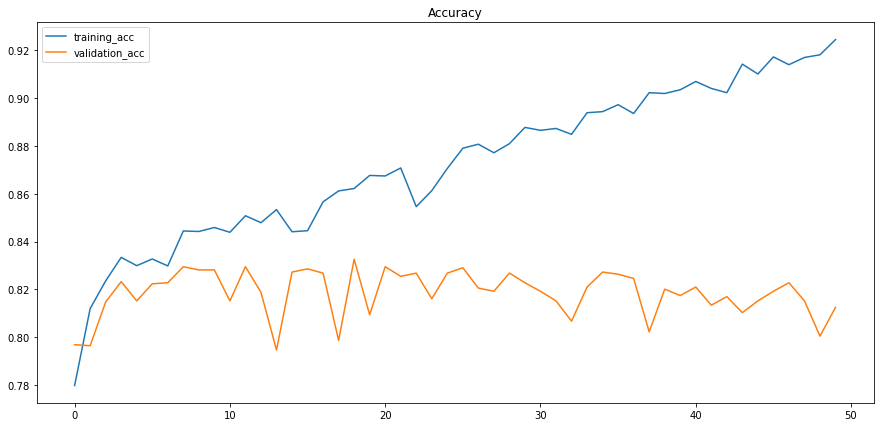

In [205]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 7))
plt.plot(range(50), snn_model_history.history['acc'])
plt.plot(range(50), snn_model_history.history['val_acc'])
plt.legend(['training_acc', 'validation_acc'])
plt.title('Accuracy')

In [209]:
emb_dim = embedding_matrix.shape[1]
gru_model = Sequential()
gru_model.add(Embedding(vocab_length, emb_dim, trainable = False, weights=[embedding_matrix]))
# embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
gru_model.add(GRU(128, return_sequences=False))
gru_model.add(Dropout(0.5))
gru_model.add(Dense(1, activation = 'sigmoid'))
gru_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(gru_model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 100)         1817800   
                                                                 
 gru (GRU)                   (None, 128)               88320     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,906,249
Trainable params: 88,449
Non-trainable params: 1,817,800
_________________________________________________________________
None


In [214]:
history = gru_model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1, validation_split=0.2)

Epoch 1/10
70/70 [==============================] - 28s 397ms/step - loss: 0.5507 - accuracy: 0.7619 - val_loss: 0.5631 - val_accuracy: 0.7496
Epoch 2/10
70/70 [==============================] - 28s 396ms/step - loss: 0.5501 - accuracy: 0.7619 - val_loss: 0.5629 - val_accuracy: 0.7496
Epoch 3/10
70/70 [==============================] - 28s 403ms/step - loss: 0.5506 - accuracy: 0.7619 - val_loss: 0.5628 - val_accuracy: 0.7496
Epoch 4/10
70/70 [==============================] - 28s 404ms/step - loss: 0.5511 - accuracy: 0.7619 - val_loss: 0.5630 - val_accuracy: 0.7496
Epoch 5/10
70/70 [==============================] - 30s 430ms/step - loss: 0.5507 - accuracy: 0.7619 - val_loss: 0.5631 - val_accuracy: 0.7496
Epoch 6/10
70/70 [==============================] - 27s 389ms/step - loss: 0.5502 - accuracy: 0.7619 - val_loss: 0.5633 - val_accuracy: 0.7496
Epoch 7/10
70/70 [==============================] - 27s 388ms/step - loss: 0.5504 - accuracy: 0.7619 - val_loss: 0.5631 - val_accuracy: 0.7496

In [222]:
predictions = (gru_model.predict(X_test) > 0.5).astype("int32")
gruf1=f1_score(y_test,predictions)
gruf1

88/88 [==============================] - 2s 22ms/step


0.8562091503267973

Text(0.5, 1.0, 'Accuracy')

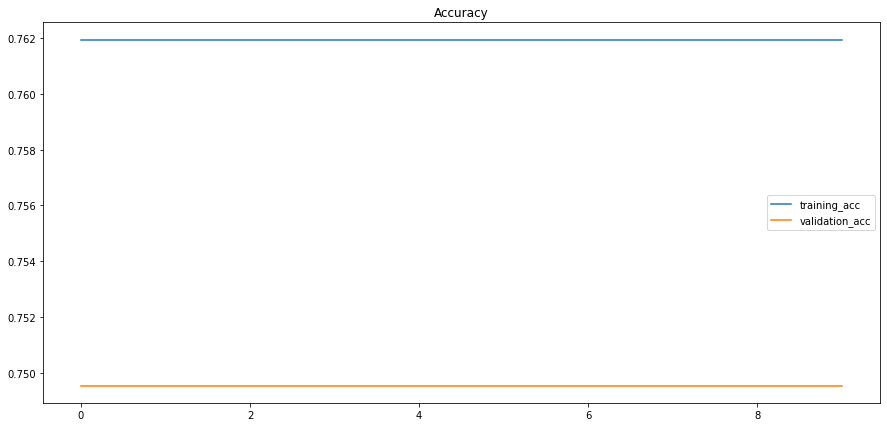

In [217]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 7))
plt.plot(range(10), history.history['accuracy'])
plt.plot(range(10), history.history['val_accuracy'])
plt.legend(['training_acc', 'validation_acc'])
plt.title('Accuracy')

In [226]:
model2 = Sequential()
model2.add(Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False))
model2.add(Bidirectional(LSTM(128,return_sequences = False)))
model2.add(Dropout(0.2))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(loss = 'binary_crossentropy',
               optimizer = 'adam',
               metrics=['accuracy'])
model2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 100, 100)          1817800   
                                                                 
 bidirectional (Bidirectiona  (None, 256)              234496    
 l)                                                              
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 1)                 257       
                                                                 
Total params: 2,052,553
Trainable params: 234,753
Non-trainable params: 1,817,800
_________________________________________________________________


In [229]:
bi_lstm = model2.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1, validation_split=0.2)

Epoch 1/10
70/70 [==============================] - 68s 948ms/step - loss: 0.5329 - accuracy: 0.7603 - val_loss: 0.5016 - val_accuracy: 0.7652
Epoch 2/10
70/70 [==============================] - 84s 1s/step - loss: 0.4802 - accuracy: 0.7749 - val_loss: 0.4752 - val_accuracy: 0.7817
Epoch 3/10
70/70 [==============================] - 93s 1s/step - loss: 0.4495 - accuracy: 0.7962 - val_loss: 0.4579 - val_accuracy: 0.7933
Epoch 4/10
70/70 [==============================] - 111s 2s/step - loss: 0.4127 - accuracy: 0.8194 - val_loss: 0.4312 - val_accuracy: 0.8170
Epoch 5/10
70/70 [==============================] - 96s 1s/step - loss: 0.3940 - accuracy: 0.8314 - val_loss: 0.4207 - val_accuracy: 0.8214
Epoch 6/10
70/70 [==============================] - 77s 1s/step - loss: 0.3760 - accuracy: 0.8379 - val_loss: 0.4182 - val_accuracy: 0.8246
Epoch 7/10
70/70 [==============================] - 71s 1s/step - loss: 0.3626 - accuracy: 0.8432 - val_loss: 0.4219 - val_accuracy: 0.8237
Epoch 8/10
70/70

In [230]:
predictions = (model2.predict(X_test) > 0.5).astype("int32")
bilstmf1=f1_score(y_test,predictions)
bilstmf1

88/88 [==============================] - 6s 65ms/step


0.8855699538765649

Text(0.5, 1.0, 'Accuracy')

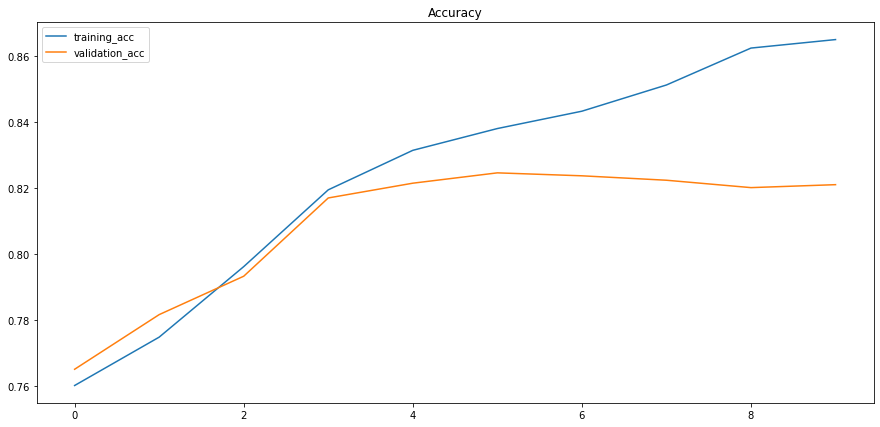

In [231]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 7))
plt.plot(range(10), bi_lstm.history['accuracy'])
plt.plot(range(10), bi_lstm.history['val_accuracy'])
plt.legend(['training_acc', 'validation_acc'])
plt.title('Accuracy')

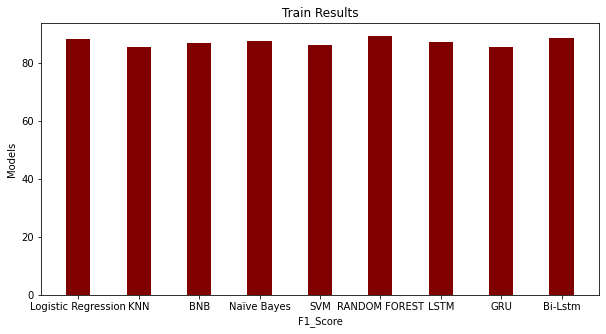

In [232]:
import matplotlib.pyplot as plt
 
data = {'Logistic Regression':f1_score_data['F1 Score'][0]*100, 'KNN':f1_score_data['F1 Score'][1]* 100,
       'BNB':f1_score_data['F1 Score'][2]* 100,'Naïve Bayes':f1_score_data['F1 Score'][3]* 100,
       'SVM':f1_score_data['F1 Score'][4]* 100,'RANDOM FOREST':f1_score_data['F1 Score'][5]* 100,
       'LSTM':lstmf1* 100,'GRU':gruf1* 100, 'Bi-Lstm':bilstmf1* 100}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("F1_Score")
plt.ylabel("Models")
plt.title("Train Results")
plt.show()